In [2]:
%load_ext autoreload
%autoreload
import plot_cap


The following calculates the mass on a compuational particle given the release rate in g/h (69,333 g/h for CAPTEX 1) and the number of particles released per hour. It then calculates the concentration if one computational particle is found in a volume. For the histogram method, the instantaneous concentration cannot be below this amount. Smaller concentrations may be obtained by time averaging as a particle can spend only a portion of time in the volume. 

        

In [10]:
%autoreload
import captex_example as ce
calculator = ce.min_conc_calculator

# 5 minute time step.
# 3 hour averaging time.
tm=3*60/5.0
# number of particles is released over the 3 hour time period.

print("C_l for 3 hour averaging time and 5 minute time step")
print('250,000 particles. High resolution grid {:3.1f} pg/m3'.format(calculator(0.05,25,250000/3) * 1e12 /tm))
print('5,000 particles. High resolution grid {:3.1f} pg/m3'.format(calculator(0.05,25,5000/3) * 1e12 / tm))
print('50,000 particles. High resolution grid {:3.1f} pg/m3'.format(calculator(0.05,25,50000/3) * 1e12 /tm))
print('50,000 particles. Standard resolution grid {:3.1f} pg/m3$'.format(calculator(0.25,100,50000/3) * 1e12/tm))
print('5,000,000 particles. High resolution grid {:3.1f} pg/m3'.format(calculator(0.05,25,5000000/3) * 1e12/tm))    
    
    
    
print('5,000,000 particles. High resolution grid {:3.1f} pg/m3'.format(calculator(0.25,1000,561000/8) ))

C_l for 3 hour averaging time and 5 minute time step
250,000 particles. High resolution grid 39.2 pg/m3
5,000 particles. High resolution grid 1958.3 pg/m3
50,000 particles. High resolution grid 195.8 pg/m3
50,000 particles. Standard resolution grid 2.0 pg/m3$
5,000,000 particles. High resolution grid 2.0 pg/m3
5,000,000 particles. High resolution grid 0.0 pg/m3


In [26]:
# Define which runs go into the plot, their symbols, offset, color etc.
runlist = []
chash={}
lwhash={}
offsethash={}
label = {}
# Standard output from cdump files 5000 particles.
tag='HIC'
runlist.append('HIC')
chash['HIC'] = 'co'
lwhash['HIC'] = 1
offsethash[tag]=-0.25
label[tag]='RunC Histogram'
# different seed
# runD
tag='HID'
runlist.append('HID')
chash['HID'] = 'cs'
lwhash['HID'] = 1
offsethash[tag]=-0.25
label[tag]='RunD Histogram'
# CDUMP file 250000 particles
# runA
tag='HI'
runlist.append('HI')
chash['HI'] = 'mo'
lwhash['HI'] = 2
offsethash[tag]=-0.25
label[tag]='RunA Histogram'
# CDUMP file 50000 particles
# runB
tag='HIB'
runlist.append('HIB')
chash['HIB'] = 'ro'
lwhash['HIB'] = 2
offsethash[tag]=-0.25
label[tag]='RunB Histogram'
# Standard run
# runE
tag='TT'
runlist.append('TT')
chash['TT'] = 'ks'
lwhash['TT'] = 4
label[tag]='RunE Histogram $0.25^ox0.25^ox100m$'

greenoffset = 0.25
# 5000 particles
# bgm nnn=30
tag='JJ'
runlist.append(tag)
chash[tag] = 'gs'
offsethash[tag]=greenoffset
label[tag]='RunC BGM n=30'
# gmm nnn=30
tag='JJ2'
runlist.append(tag)
chash[tag] = 'g^'
offsethash[tag]=greenoffset
label[tag]='RunC GMM n=30'

# gmm=30 different seed
tag='JJ3'
runlist.append('JJ3')
chash['JJ3'] = 'g+'
offsethash[tag]=greenoffset
label[tag]='RunD GMM n=30'

# same as JJ2 but averaging together
tag='JJ4'
runlist.append('JJ4')
chash['JJ4'] = 'g*'
offsethash[tag]=greenoffset
label[tag]='RunC GMM n=30 tmave=aggregate'

#gmm=50 together
#5,000 particles
# high resolution
tag='IC'
runlist.append(tag)
chash[tag]='bs'
offsethash[tag]=greenoffset
label[tag]='RunB GMM n=50 tmave=aggregate'


#gmm=50 apart
#50,000 particles
# 0.1 degree 20m
tag='BB'
runlist.append(tag)
chash[tag]='y*'
offsethash[tag]=greenoffset
label[tag]='RunB GMM n=50 $0.1^ox0.1^ox20m$'

#gmm=10 apart
#50,000 particles
# 0.1 degree 20m
tag='AA'
runlist.append(tag)
chash[tag]='yd'
offsethash[tag]=greenoffset
label[tag]='RunB GMM n=10 $0.1^ox0.1^ox20m$'

#gmm=10 apart
#50,000 particles
# 0.1 degree 100m
tag='HH'
runlist.append(tag)
chash[tag]='y^'
offsethash[tag]=greenoffset
label[tag]='RunB GMM n=10 $0.1^ox0.1^ox100m$'


#bgmm=10 apart
#5,000 particles
# 0.1 degree 100m
tag='GG'
runlist.append(tag)
chash[tag]='yo'
offsethash[tag]=greenoffset
label[tag]='RunD BGM n=10 $0.1^ox0.1^ox100m$'

['HIC', 'HID', 'HI', 'HIB', 'TT', 'JJ', 'JJ2', 'JJ3', 'JJ4', 'IC', 'BB', 'AA', 'HH', 'GG']


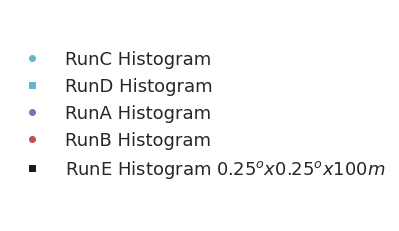

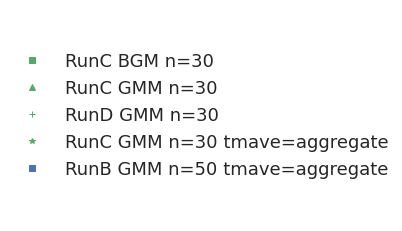

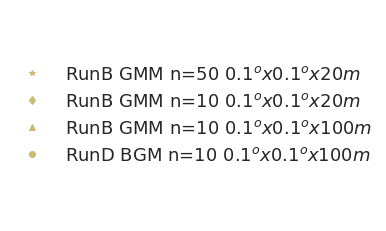

In [33]:
# make the legend for the plot.
import seaborn as sns
keylist = list(chash.keys())
print(keylist)
sns.set_style('white')

def make_legend(keylist,chash,ltag='a'):
    for tag in keylist:  
        plt.plot(1,1,chash[tag],label=label[tag])
    ax = plt.gca()
    handles,labels=ax.get_legend_handles_labels()
    plt.close()
    figlegend=plt.figure()
    ax1=figlegend.add_subplot(1,1,1)
    ax1.legend(handles,labels,loc='center',prop={"size":18},frameon=False)
    #legend = plt.legend()
    #legend.get_frame().set_facecolor('none')
    ax1.axis('off')    
    plt.savefig('rank_legend{}.png'.format(ltag))
    plt.show()

make_legend(keylist[0:5],chash,ltag='a')
make_legend(keylist[5:10],chash,ltag='b')
make_legend(keylist[10:len(keylist)+1],chash,ltag='c')


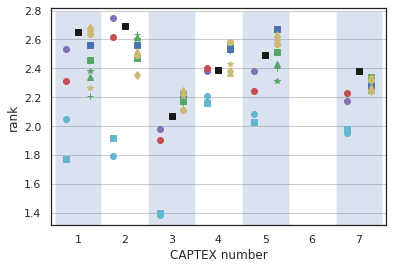

In [28]:
#create the rank plot
%autoreload
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

patches = [Rectangle((0.5,1.3),1,1.5,fill=True,color='b',alpha=0.1)]
patches.append(Rectangle((2.5,1.3),1,1.5,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((4.5,1.3),1,1.5,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((6.5,1.3),1,1.5,fill=True,color='b',alpha=0.1))
pc = PatchCollection(patches, alpha=0.2)
    
mr = plot_cap.MultRuns(runlist)
mr.chash=chash
mr.lwhash=lwhash
mr.offsethash = offsethash
mr.plot('rank', 'rank.png')
fig = plt.gcf()
ax = plt.gca()
ax.add_collection(pc)
#ax.add_collection(pc)
plt.savefig('rank.png')
plt.show()





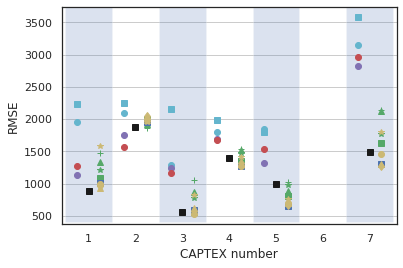

In [42]:
patches = [Rectangle((0.5,400),1,4000,fill=True,color='b',alpha=0.1)]
patches.append(Rectangle((2.5,400),1,4000,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((4.5,400),1,4000,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((6.5,400),1,4000,fill=True,color='b',alpha=0.1))
pc2 = PatchCollection(patches, alpha=0.2)
mr.plot('RMSE','RMSE.png')
ax = plt.gca()
ax.add_collection(pc2)
ax = plt.gca()
plt.savefig('RMSE.png')


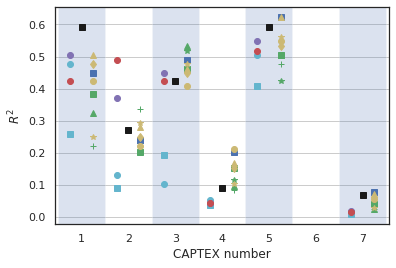

In [43]:
%autoreload
x1=-0.2
x2=2
patches = [Rectangle((0.5,x1),1,x2,fill=True,color='b',alpha=0.1)]
patches.append(Rectangle((2.5,x1),1,x2,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((4.5,x1),1,x2,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((6.5,x1),1,x2,fill=True,color='b',alpha=0.1))
pc2 = PatchCollection(patches, alpha=0.2)


mr.plot('R','Rauto.png')
ax = plt.gca()
ax.add_collection(pc2)
plt.savefig('Rauto.png')
ax = plt.gca()


plt.show()

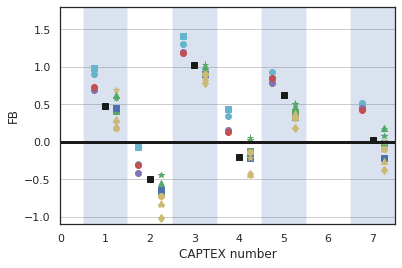

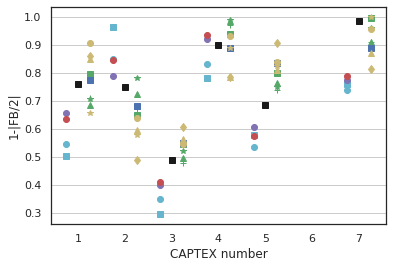

In [44]:
x1=-1.1
x2=3
patches = [Rectangle((0.5,x1),1,x2,fill=True,color='b',alpha=0.1)]
patches.append(Rectangle((2.5,x1),1,x2,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((4.5,x1),1,x2,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((6.5,x1),1,x2,fill=True,color='b',alpha=0.1))
pc2 = PatchCollection(patches, alpha=0.2)

mr.plot('FB', 'FB.png')
ax = plt.gca()
ax.add_collection(pc2)
ax = plt.gca()
plt.plot([0,7.5],[0,0],'-k', LineWidth=3)
plt.xlim(0,7.5)
plt.ylim(-1.1,1.8)
plt.savefig('FB.png')
plt.show()
mr.plot('FB rank')
plt.savefig('FBrank.png')
plt.show()


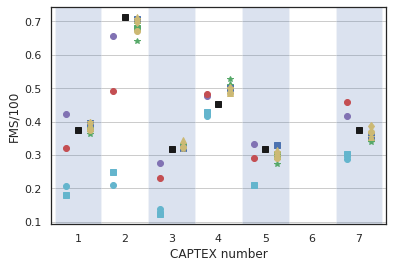

In [45]:
x1=-1
x2=3
patches = [Rectangle((0.5,x1),1,x2,fill=True,color='b',alpha=0.1)]
patches.append(Rectangle((2.5,x1),1,x2,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((4.5,x1),1,x2,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((6.5,x1),1,x2,fill=True,color='b',alpha=0.1))
pc2 = PatchCollection(patches, alpha=0.2)

mr.plot('FMS', 'FMS.png')
ax = plt.gca()
ax.add_collection(pc2)
plt.savefig('FMS.png')
plt.show()




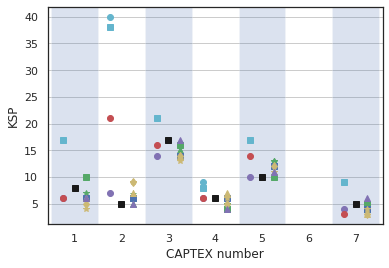

In [9]:
x1=-1
x2=50
patches = [Rectangle((0.5,x1),1,x2,fill=True,color='b',alpha=0.1)]
patches.append(Rectangle((2.5,x1),1,x2,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((4.5,x1),1,x2,fill=True,color='b',alpha=0.1))
patches.append(Rectangle((6.5,x1),1,x2,fill=True,color='b',alpha=0.1))
pc2 = PatchCollection(patches, alpha=0.2)

mr.plot('KSP', 'KS.png')
ax = plt.gca()
ax.add_collection(pc2)
plt.savefig('KS.png')
plt.show()